In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt

# Data Preparation and Cleansing

In [2]:
#import raw data
df = pd.read_csv('HFT_FullDataSet.csv')

In [3]:
df

,Dates,t-4_t-3,t-3_t-2,t-2_t-1,t-1_t,2007 % change,3883 % change,1109 % change,1113 % change,16 % change,...,RSI,RSI_SIGNAL_40,DMI_PLUS,DMI_MINUS,ADX,ADXR,ADX_SIGNAL,FEAR_GREED,VMAVG,Y
0,26/4/2019 9:30,-1,1,0,1,0.021036,0.013514,0.007440,-0.005431,0.005181,...,71.269241,0,28.581105,7.147810,16.574226,18.498512,0,1.955641e-01,24.745316,0
1,26/4/2019 9:31,1,0,1,0,-0.001585,-0.001667,-0.005908,-0.001560,-0.001473,...,71.269241,0,30.965009,6.352265,20.101450,20.209665,0,2.410769e-01,24.777247,0
2,26/4/2019 9:32,0,1,0,0,0.001587,-0.006678,-0.002972,0.000000,0.001475,...,71.269241,0,29.214194,5.993097,23.376730,21.163079,0,2.363846e-01,24.807565,0
3,26/4/2019 9:33,1,0,0,-1,0.000000,0.000000,0.005961,0.000781,-0.000736,...,64.129119,0,24.701830,15.364611,23.371559,20.525141,0,1.468974e-01,24.827531,0
4,26/4/2019 9:34,0,0,-1,-1,-0.001585,0.000000,0.002963,0.000781,-0.002211,...,57.883922,0,23.404153,14.557452,23.366757,19.932770,0,6.387179e-02,24.832497,0
5,26/4/2019 9:35,0,-1,-1,0,0.003175,0.006723,0.000000,-0.000780,0.000000,...,57.883922,0,23.404153,14.557452,23.366757,19.932770,0,6.387179e-02,24.832497,0
6,26/4/2019 9:36,-1,-1,0,0,-0.003165,0.000000,0.000000,0.001561,-0.000739,...,57.883922,0,23.404153,14.557452,23.362299,19.382712,0,1.782051e-02,24.836137,1
7,26/4/2019 9:37,-1,0,0,1,-0.003175,-0.010017,0.000000,0.000000,-0.000739,...,62.157928,0,27.802877,13.721451,24.115797,19.250762,0,2.912821e-02,24.849723,0
8,26/4/2019 9:38,0,0,1,-1,0.001592,0.003373,0.000000,0.000779,0.000000,...,56.034083,0,26.183550,18.746587,23.575546,18.508273,0,1.653846e-02,24.849773,0
9,26/4/2019 9:39,0,1,-1,-1,0.001590,0.001681,0.000000,-0.000779,-0.000740,...,50.659182,0,24.638160,23.542275,22.054045,17.308900,0,-1.823077e-02,24.842009,0


# Seperating Training Dataset and Testing Dataset

In [4]:
#Seperate independent and dependent variables
y = df['Y']
X = df.drop(columns=['Y','Dates'])
X_col = X.columns
X_col

Index(['t-4_t-3', 't-3_t-2', 't-2_t-1', 't-1_t', '2007 % change',
       '3883 % change', '1109 % change', '1113 % change', '16 % change',
       '914 % change', '388 % change', 'Volume t-1', 'Volume_Indicator_0.5',
       'Ticks', '3333_TicksAvg', 'BB_LOWER', 'BB_SIGNAL_0.05', 'BB_WIDTH',
       'BB_PERCENT', 'MOMENTUM', 'MOM_MA', 'MACD', 'MACD_SIGNAL_LINE',
       'MACD_DIFF', 'MACD_SIGNAL', 'RSI', 'RSI_SIGNAL_40', 'DMI_PLUS',
       'DMI_MINUS', 'ADX', 'ADXR', 'ADX_SIGNAL', 'FEAR_GREED', 'VMAVG'],
      dtype='object')

In [5]:
ros = RandomOverSampler(random_state=12)
X_resampled, y_resampled = ros.fit_sample(X, y)

In [16]:
X_Strain, X_Stest, y_Strain, y_Stest = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=55)
X_train =  pd.DataFrame(data=X_Strain[0:,0:], columns = X_col)
X_test =  pd.DataFrame(data=X_Stest[0:,0:], columns = X_col)
y_train = y_Strain
y_test = y_Stest
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(45390, 34) (45390,)
(30260, 34) (30260,)


# Modelling with Logistic Regression

In [44]:
X_trainLR = X_train.drop(columns=['BB_LOWER','BB_PERCENT','MOM_MA','MACD','MACD_SIGNAL_LINE','ADX','RSI','Volume t-1','ADXR','DMI_PLUS','DMI_MINUS'])
y_trainLR = y_train
X_testLR = X_test.drop(columns=['BB_LOWER','BB_PERCENT','MOM_MA','MACD','MACD_SIGNAL_LINE','ADX','RSI','Volume t-1','ADXR','DMI_PLUS','DMI_MINUS'])
y_testLR = y_test

In [45]:
# For each Xi, calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_trainLR.values, i) for i in range(X_trainLR.shape[1])]
vif["features"] = X_trainLR.columns
vif.round(1)

,VIF Factor,features
0,1.2,t-4_t-3
1,1.3,t-3_t-2
2,1.3,t-2_t-1
3,1.4,t-1_t
4,1.2,2007 % change
5,1.1,3883 % change
6,1.2,1109 % change
7,1.3,1113 % change
8,1.3,16 % change
9,1.1,914 % change


In [46]:
model = LogisticRegression(C = 1e9)
model = model.fit (X_trainLR,y_trainLR)

In [47]:
param = pd.DataFrame()
param['var']=X_trainLR.columns
param['coef']=np.transpose(model.coef_)
print (param)

                     var      coef
0                t-4_t-3 -0.039732
1                t-3_t-2 -0.042715
2                t-2_t-1 -0.186366
3                  t-1_t -0.562641
4          2007 % change  0.004501
5          3883 % change  0.002979
6          1109 % change  0.003449
7          1113 % change  0.002016
8            16 % change  0.001898
9           914 % change  0.002447
10          388 % change  0.002006
11  Volume_Indicator_0.5  0.105654
12                 Ticks  0.015959
13         3333_TicksAvg  0.000007
14        BB_SIGNAL_0.05  0.229699
15              BB_WIDTH  0.344060
16              MOMENTUM -0.012242
17             MACD_DIFF  0.001031
18           MACD_SIGNAL  0.123999
19         RSI_SIGNAL_40  0.080746
20            ADX_SIGNAL -0.007756
21            FEAR_GREED -0.005482
22                 VMAVG -0.037508


In [48]:
## Instantiate The Logistic Regression
sm_model = sm.Logit(y_trainLR, X_trainLR).fit(disp=0)
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45390
Model:                          Logit   Df Residuals:                    45367
Method:                           MLE   Df Model:                           22
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.05577
Time:                        22:33:29   Log-Likelihood:                -29707.
converged:                       True   LL-Null:                       -31462.
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
t-4_t-3                 -0.0428      0.016     -2.601      0.009      -0.075      -0.011
t-3_t-2                 -0.0549      0.017     -3.223      0.001      -0.088      -0.022
t-2_t-1                 -0.2173      0.017    -12.689      0.000      -0.251      -0.184
t-1_t                   -0.6339      0.017    -36.626      0.000      -0.668      -0.600
2007 % change           63.2355      6.654      9.503      0.000      50.193      76.278
3883 % change           35.1550      6.432      5.466      0.000      22.548      47.762
1109 % change           52.3171      7.447      7.025      0.000      37.721      66.913
1113 % change           31.5099     10.025      3.143      0.002      11.862      51.158
16 % change             25.3435     10.262      2.470      0.014       5.230      45.457
914 % change            44.1102      7.952      5.547      0.000      28.524      59.696
388 % change            48.2061     10.568      4.561      0.000      27.493      68.920
Volume_Indicator_0.5     0.0923      0.029      3.211      0.001       0.036       0.149
Ticks                    0.0162      0.001     16.899      0.000       0.014       0.018
3333_TicksAvg         7.622e-06   1.84e-06      4.133      0.000    4.01e-06    1.12e-05
BB_SIGNAL_0.05           0.2250      0.025      8.886      0.000       0.175       0.275
BB_WIDTH                 0.3535      0.022     16.181      0.000       0.311       0.396
MOMENTUM                -0.3451      0.229     -1.506      0.132      -0.794       0.104
MACD_DIFF                5.8525      2.385      2.454      0.014       1.179      10.526
MACD_SIGNAL              0.1637      0.028      5.926      0.000       0.110       0.218
RSI_SIGNAL_40            0.0762      0.032      2.387      0.017       0.014       0.139
ADX_SIGNAL               0.0047      0.038      0.126      0.900      -0.069       0.078
FEAR_GREED              -0.2209      0.286     -0.772      0.440      -0.782       0.340
VMAVG                   -0.0386      0.001    -28.204      0.000      -0.041      -0.036
========================================================================================
"""

In [49]:
## Predict Class Labels
predicted = model.predict(X_trainLR)

In [50]:
## Evaluate The Model Confusion Matrix
print (metrics.confusion_matrix(y_trainLR, predicted))
## Classification Report
print (metrics.classification_report(y_trainLR, predicted))
## Model Accuracy
print (model.score(X_trainLR,y_trainLR))

[[14883  7789]
 [ 9740 12978]]
             precision    recall  f1-score   support

          0       0.60      0.66      0.63     22672
          1       0.62      0.57      0.60     22718

avg / total       0.61      0.61      0.61     45390

0.613813615333774


In [51]:
## Predict Class Labels
predicted = model.predict(X_testLR)

In [52]:
## Evaluate The Model Confusion Matrix
print (metrics.confusion_matrix(y_testLR, predicted))
## Classification Report
print (metrics.classification_report(y_testLR, predicted))
## Model Accuracy
print (model.score(X_testLR,y_testLR))

[[10010  5143]
 [ 6553  8554]]
             precision    recall  f1-score   support

          0       0.60      0.66      0.63     15153
          1       0.62      0.57      0.59     15107

avg / total       0.61      0.61      0.61     30260

0.6134831460674157


# Trading Demostration

In [58]:
# Modelling with Logistic Regression
df_Price = pd.read_csv('Actual_TestingData_Price.csv')
df_Par = pd.read_csv('Actual_TestingData_Indicators.csv')
y_actualLR = df_Par['Y']
df_Par = df_Par.drop(columns=['BB_LOWER','BB_PERCENT','MOM_MA','MACD','MACD_SIGNAL_LINE','ADX','RSI','Volume t-1','ADXR','DMI_PLUS','DMI_MINUS','Y','Dates'])

In [55]:
principal=1000000
stock = 0
principal_a = []
stock_a = []
asset_a = []
#if the transaction cost is considered, 0.015% would be the max. for prrofit gain
for x in range (0, 993):
    if stock != 0:
        principal = stock * float(df_Price.Price[[x]])+principal
        stock = 0
    if model.predict(df_Par.iloc[[x]])==1:
        stock = int((principal/float(df_Price.Price[[x]]))/1000)*1000
        principal = principal-stock*float(df_Price.Price[[x]])
    principal_a.append(principal)
    stock_a.append(stock)
    asset_a.append(principal+stock*float(df_Price.Price[[x]]))

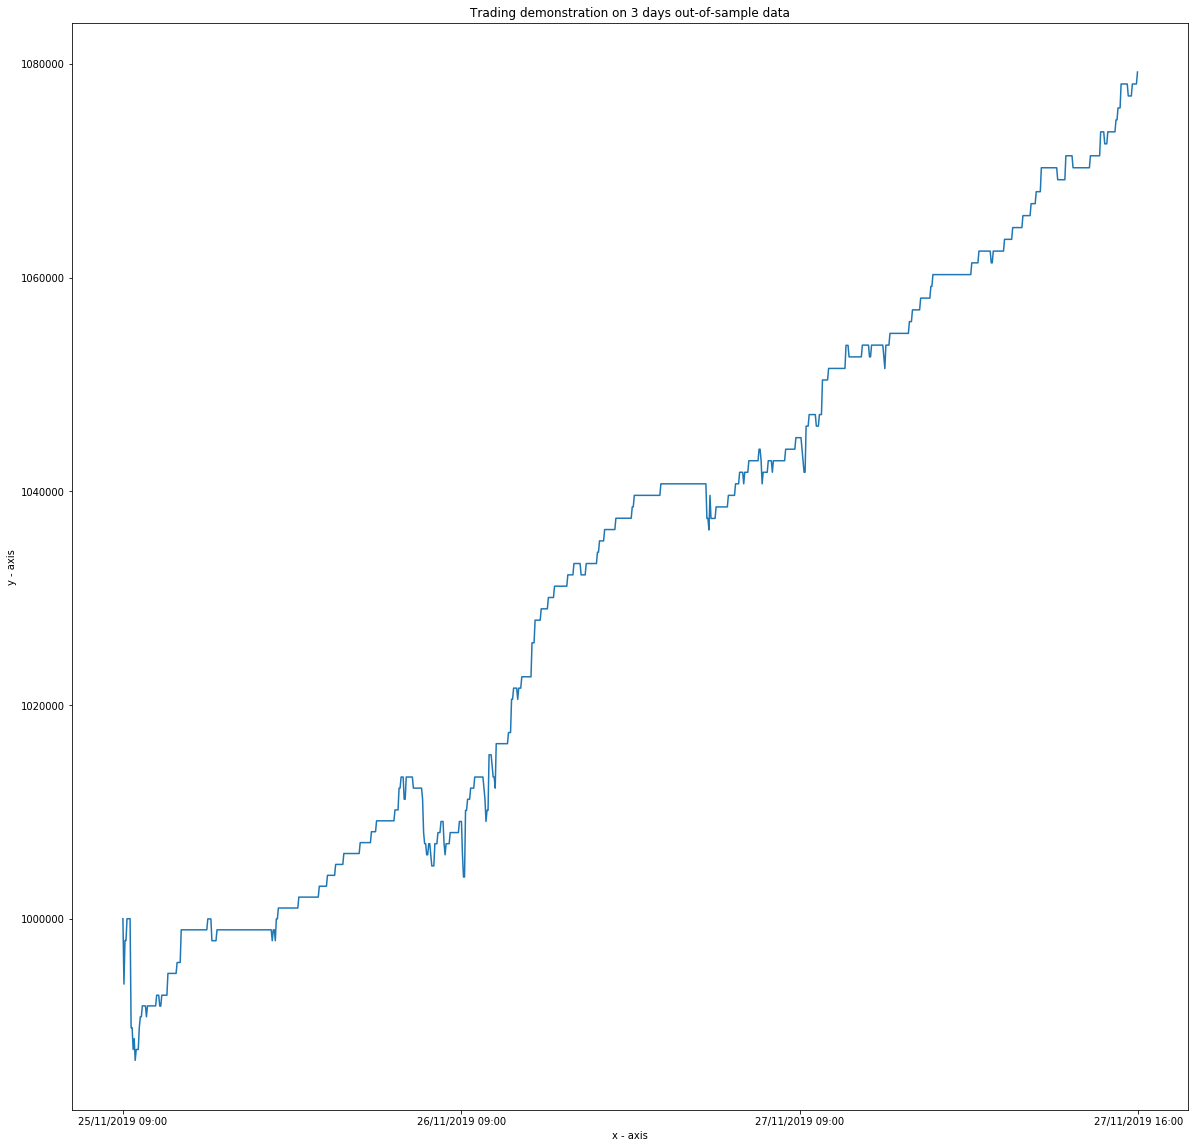

In [56]:
y=asset_a
x=df_Price.Dates
fig= plt.figure(figsize=(20,20))
# plotting the points  
plt.plot(x, y) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Trading demonstration on 3 days out-of-sample data')
plt.xticks(np.arange(0,1324,step=331),('25/11/2019 09:00','26/11/2019 09:00','27/11/2019 09:00','27/11/2019 16:00'))
# function to show the plot 
plt.show()

In [60]:
predicted = model.predict(df_Par)
## Evaluate The Model Confusion Matrix
print (metrics.confusion_matrix(y_actualLR, predicted))
## Classification Report
print (metrics.classification_report(y_actualLR, predicted))
## Model Accuracy
print (model.score(df_Par,y_actualLR))

[[551 225]
 [107 110]]
             precision    recall  f1-score   support

          0       0.84      0.71      0.77       776
          1       0.33      0.51      0.40       217

avg / total       0.73      0.67      0.69       993

0.6656596173212488
